# Google N-grams - Unigram creation


In [32]:
import csv
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from scipy.interpolate import interp1d
pd.set_option('display.float_format', lambda x: '%.3f' % x)
def tf(x):
    return 1+np.log10(x)

def decader(x):
    return(x -x%10)

from itertools import groupby
from operator import itemgetter
import pickle as pkl
import re
def patternmaker(x):
    x=np.array(x.notnull())
    x=x.astype(int)
    #print(x)
    val = ''.join(map(str, x))
    #print(val)
    return val

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()


def lemmamaker(word):
    #print(word)
    return(lemmatizer.lemmatize(word.word,word.pos))

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/users0/dharpt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The datasets are from the site http://storage.googleapis.com/books/ngrams/books/datasetsv2.html.

In this notebook, the extraction of one of the 26 unigrams is shown, while the remaining 25 unigrams are extracted in a regular python program.

The uni-gram dataset has the following fields -
1. $year$ - Year the unigram appeared in
2. $count$ - Frequency of the uni-gram
3. $word$ - The uni-gram
4. $pos$ - The POS of the uni-gram



In [34]:
unigram   = pd.read_csv('http://storage.googleapis.com/books/ngrams/books/googlebooks-eng-all-1gram-20120701-a.gz', compression='gzip', header=None, sep='\t', quotechar='"',usecols=[0,1,2])
unigram.columns=['word_pos','year','count']
unigram['word'], unigram['pos'] = unigram['word_pos'].str.split('_', 1).str
unigram.drop(["word_pos"],axis=1,inplace=True)
display(unigram.head(10))
unigram.tail(10)

,year,count,word,pos
0,1879,45,A'Aang,NOUN
1,1882,5,A'Aang,NOUN
2,1885,1,A'Aang,NOUN
3,1891,1,A'Aang,NOUN
4,1899,20,A'Aang,NOUN
5,1927,3,A'Aang,NOUN
6,1959,5,A'Aang,NOUN
7,1962,2,A'Aang,NOUN
8,1963,1,A'Aang,NOUN
9,1966,45,A'Aang,NOUN


,year,count,word,pos
86618495,1999,149,→,ADJ
86618496,2000,114,→,ADJ
86618497,2001,94,→,ADJ
86618498,2002,203,→,ADJ
86618499,2003,198,→,ADJ
86618500,2004,523,→,ADJ
86618501,2005,348,→,ADJ
86618502,2006,456,→,ADJ
86618503,2007,621,→,ADJ
86618504,2008,566,→,ADJ


As we can see, the unigram dataset has to be cleaned. This involves -

1. Selecting only those words that are tagged as NOUN, ADJ and VRB (can be changed later to add ADV)
2. Merging years to decades

Given below is the count of each POS tag along with their percentage.
 

In [35]:
pos_counts=unigram.pos.value_counts().to_frame()
pos_counts['perc']=round((pos_counts.pos/pos_counts.pos.sum())*100,3)
print("Nouns, verbs and adjectives account for ",pos_counts.loc[["NOUN","VERB","ADJ"]].perc.sum(),"% of the dataset")
display(pos_counts.head(10))
pos_counts.tail(10)

Nouns, verbs and adjectives account for  63.475 % of the dataset


,pos,perc
NOUN,21677778,43.019
X,6131126,12.167
VERB,5317668,10.553
ADJ,4990200,9.903
DET,4578472,9.086
ADP,2395255,4.753
NUM,1184618,2.351
ADV,1038647,2.061
.,952956,1.891
PRON,727474,1.444


,pos,perc
Applications,4,0.000
regsql_ADJ,4,0.000
LocalResources,4,0.000
Users_NOUN,4,0.000
Themes,4,0.000
Profile,4,0.000
SNAPSHOT_ISOLATION,4,0.000
Data_NOUN,4,0.000
continue_NOUN,3,0.000
continue,3,0.000


## Removal of Unnecessary tags

We select only the 3 required tags and remove the remaining tags

In [36]:
unigram=unigram[unigram.pos.isin(["NOUN","VERB","ADJ"])]
display(unigram.head(10))
unigram.tail(10)

,year,count,word,pos
0,1879,45,A'Aang,NOUN
1,1882,5,A'Aang,NOUN
2,1885,1,A'Aang,NOUN
3,1891,1,A'Aang,NOUN
4,1899,20,A'Aang,NOUN
5,1927,3,A'Aang,NOUN
6,1959,5,A'Aang,NOUN
7,1962,2,A'Aang,NOUN
8,1963,1,A'Aang,NOUN
9,1966,45,A'Aang,NOUN


,year,count,word,pos
86618495,1999,149,→,ADJ
86618496,2000,114,→,ADJ
86618497,2001,94,→,ADJ
86618498,2002,203,→,ADJ
86618499,2003,198,→,ADJ
86618500,2004,523,→,ADJ
86618501,2005,348,→,ADJ
86618502,2006,456,→,ADJ
86618503,2007,621,→,ADJ
86618504,2008,566,→,ADJ


## Converting decades to years

Years are converted to decades and we merge the dataset.

In [37]:
unigram.year=unigram.year.apply(decader)
display(unigram.head(10))
unigram.tail(10)

,year,count,word,pos
0,1870,45,A'Aang,NOUN
1,1880,5,A'Aang,NOUN
2,1880,1,A'Aang,NOUN
3,1890,1,A'Aang,NOUN
4,1890,20,A'Aang,NOUN
5,1920,3,A'Aang,NOUN
6,1950,5,A'Aang,NOUN
7,1960,2,A'Aang,NOUN
8,1960,1,A'Aang,NOUN
9,1960,45,A'Aang,NOUN


,year,count,word,pos
86618495,1990,149,→,ADJ
86618496,2000,114,→,ADJ
86618497,2000,94,→,ADJ
86618498,2000,203,→,ADJ
86618499,2000,198,→,ADJ
86618500,2000,523,→,ADJ
86618501,2000,348,→,ADJ
86618502,2000,456,→,ADJ
86618503,2000,621,→,ADJ
86618504,2000,566,→,ADJ


If we look at the count of words per decade, we see that the counts are increasing.
This should of course, come at no surprise.

We also see that words from decades 1540-1790 are present.

In [38]:
decade_counts=unigram.year.value_counts().to_frame()
decade_counts['perc']=round((decade_counts.year/decade_counts.year.sum())*100,3)
print("Words from decades 1540 to 1790 represent",round(decade_counts.iloc[21:].perc.sum(),3),"% of the current dataset")
decade_counts

Words from decades 1540 to 1790 represent 4.389 % of the current dataset


,year,perc
2000,3795659,11.867
1990,3728875,11.658
1980,3246692,10.150
1970,2923468,9.140
1960,2462436,7.699
1950,1754814,5.486
1940,1302150,4.071
1930,1271779,3.976
1920,1220108,3.815
1900,1175306,3.674


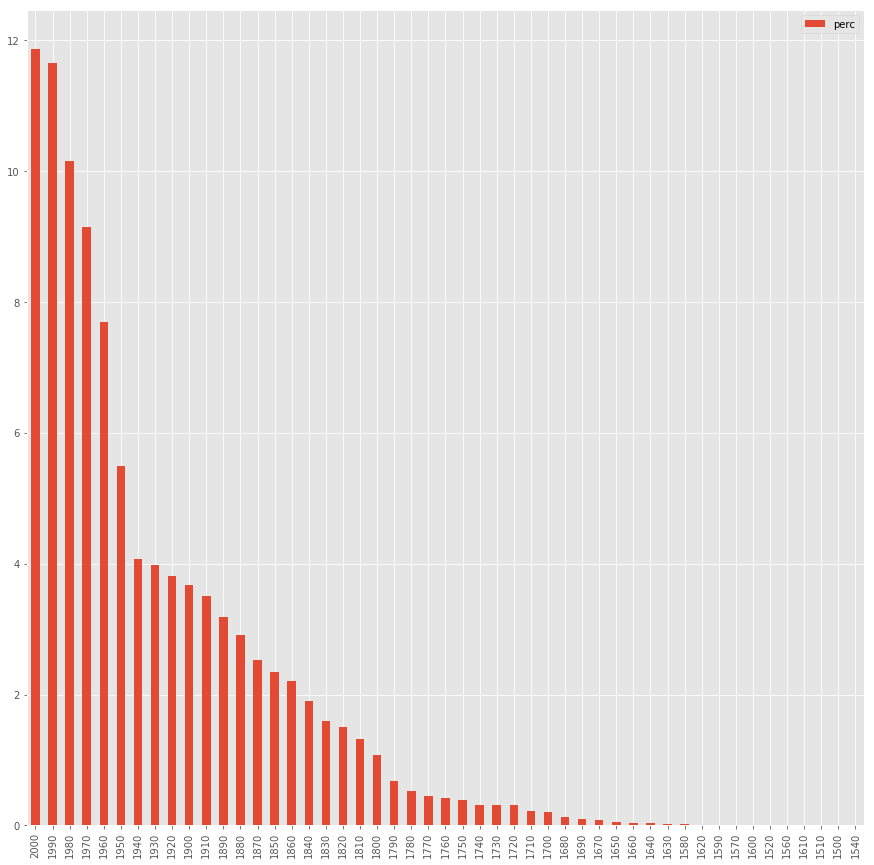

In [39]:
decade_counts.drop('year',axis=1).plot.bar(figsize=(15,15))

So we only store words occuring within the decades 1800 to 2000.

In [41]:
unigram=unigram.loc[unigram.year.isin(decade_counts.index[:21])]
display(unigram.head(10))
unigram.tail(10)

,year,count,word,pos
0,1870,45,A'Aang,NOUN
1,1880,5,A'Aang,NOUN
2,1880,1,A'Aang,NOUN
3,1890,1,A'Aang,NOUN
4,1890,20,A'Aang,NOUN
5,1920,3,A'Aang,NOUN
6,1950,5,A'Aang,NOUN
7,1960,2,A'Aang,NOUN
8,1960,1,A'Aang,NOUN
9,1960,45,A'Aang,NOUN


,year,count,word,pos
86618495,1990,149,→,ADJ
86618496,2000,114,→,ADJ
86618497,2000,94,→,ADJ
86618498,2000,203,→,ADJ
86618499,2000,198,→,ADJ
86618500,2000,523,→,ADJ
86618501,2000,348,→,ADJ
86618502,2000,456,→,ADJ
86618503,2000,621,→,ADJ
86618504,2000,566,→,ADJ


Several non english words are visible, such as "→" or äzerte, so we perform pattern matching using regeular expressions to remove them.


In [42]:
unigram=unigram.loc[unigram.word.str.match('^[a-zA-Z]+$')]
unigram.word=unigram.word.str.lower()
display(unigram.head(10))
unigram.tail(10)

,year,count,word,pos
3163,1820,1,aaaaaaaaaaaaaaaaaaa,NOUN
3164,1910,1,aaaaaaaaaaaaaaaaaaa,NOUN
3165,1920,1,aaaaaaaaaaaaaaaaaaa,NOUN
3166,1920,1,aaaaaaaaaaaaaaaaaaa,NOUN
3167,1930,1,aaaaaaaaaaaaaaaaaaa,NOUN
3168,1940,5,aaaaaaaaaaaaaaaaaaa,NOUN
3169,1940,1,aaaaaaaaaaaaaaaaaaa,NOUN
3170,1940,1,aaaaaaaaaaaaaaaaaaa,NOUN
3171,1950,1,aaaaaaaaaaaaaaaaaaa,NOUN
3172,1950,2,aaaaaaaaaaaaaaaaaaa,NOUN


,year,count,word,pos
86617185,1980,3,azoides,NOUN
86617186,1980,1,azoides,NOUN
86617187,1980,1,azoides,NOUN
86617188,1990,2,azoides,NOUN
86617189,1990,2,azoides,NOUN
86617190,1990,2,azoides,NOUN
86617191,1990,1,azoides,NOUN
86617192,2000,2,azoides,NOUN
86617193,2000,2,azoides,NOUN
86617194,2000,2,azoides,NOUN


The following tasks are now performed -
1. Lemmatizing using WordNet Lemmatizer
2. Merging the word with its tag
3. Combining word counts based on the decade

In [43]:
replacements={'pos':dict(zip(["NOUN","VERB","ADJ"],['n','v','a']))}
unigram.replace(replacements,inplace=True)
#unigram.drop(["word","pos"],axis=1,inplace=True)
unigram=unigram.groupby(['word','pos','year'])['count'].sum().to_frame()
unigram=unigram.reset_index(level=['word','pos','year'])

unigram['word_temp']=unigram.drop(["year","count"],axis=1).apply(lemmamaker,axis=1)
unigram.drop(["word"],axis=1,inplace=True)
unigram['word']=unigram['word_temp'].astype(str) + '_' + unigram['pos'].astype(str)
unigram.drop(["word_temp","pos"],axis=1,inplace=True)

unigram=unigram.groupby(['word','year'])['count'].sum().to_frame()
unigram=unigram.reset_index(level=['word','year'])
display(unigram.head(10))
unigram.tail(10)

,word,year,count
0,a_a,1800,17515
1,a_a,1810,26421
2,a_a,1820,41444
3,a_a,1830,53436
4,a_a,1840,80518
5,a_a,1850,110387
6,a_a,1860,97933
7,a_a,1870,116473
8,a_a,1880,154035
9,a_a,1890,173319


,word,year,count
4009388,rotl_n,1910,1044
4009389,rotl_n,1920,810
4009390,rotl_n,1930,3483
4009391,rotl_n,1940,3280
4009392,rotl_n,1950,4063
4009393,rotl_n,1960,4391
4009394,rotl_n,1970,4354
4009395,rotl_n,1980,4519
4009396,rotl_n,1990,6442
4009397,rotl_n,2000,10265


Words that occur more than 10 times in a decade are selected, this would correspond to selecting the upper 50 percentile of the dataset.

In [44]:
unigram["count"].describe()

count     4009398.000
mean         3328.714
std        386958.455
min             1.000
25%             3.000
50%            10.000
75%            38.000
max     529546819.000
Name: count, dtype: float64

In [13]:
#unigram=unigram[unigram.unigram.str.contains("'")==False]
unigram=unigram[unigram['count']>=10]
display(unigram.head(10))
unigram.tail(10)

,word,year,count
0,a_a,1800,17515
1,a_a,1810,26421
2,a_a,1820,41444
3,a_a,1830,53436
4,a_a,1840,80518
5,a_a,1850,110387
6,a_a,1860,97933
7,a_a,1870,116473
8,a_a,1880,154035
9,a_a,1890,173319


,word,year,count
4009388,rotl_n,1910,1044
4009389,rotl_n,1920,810
4009390,rotl_n,1930,3483
4009391,rotl_n,1940,3280
4009392,rotl_n,1950,4063
4009393,rotl_n,1960,4391
4009394,rotl_n,1970,4354
4009395,rotl_n,1980,4519
4009396,rotl_n,1990,6442
4009397,rotl_n,2000,10265


In [18]:
unigram.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315395 entries, a_a to rotl_n
Data columns (total 21 columns):
1800s    20136 non-null float64
1810s    25870 non-null float64
1820s    31419 non-null float64
1830s    33370 non-null float64
1840s    39446 non-null float64
1850s    48356 non-null float64
1860s    44431 non-null float64
1870s    51507 non-null float64
1880s    60386 non-null float64
1890s    67606 non-null float64
1900s    79882 non-null float64
1910s    73360 non-null float64
1920s    76644 non-null float64
1930s    78444 non-null float64
1940s    79470 non-null float64
1950s    110617 non-null float64
1960s    162465 non-null float64
1970s    193226 non-null float64
1980s    215255 non-null float64
1990s    248101 non-null float64
2000s    277401 non-null float64
dtypes: float64(21)
memory usage: 52.9+ MB


We can now finally pivot the dataset (convert it from a shallow to dense represenation).


I have also added 4 extra columns which are,

$cf$ : Collection frequency, which is the log of the sum of the term across decades, i.e. log(1+sum(term).

$presence$ : Number of decades a term is present in.

$idf$ : Inverse document frequency - A method from Information retrieval (explained here - https://nlp.stanford.edu/IR-book/html/htmledition/inverse-document-frequency-1.html ). It rates a unigram higher if it occurs in less number of decades.
While IDF is helpful in Information Retrieval, it might not be helpful here for novel detection. 

$term\text{-}weight$: The product of cf and idf.

Also, the decades are now suitably labbeled.

In [19]:
unigram=unigram.pivot(index='word',columns='year',values='count')
unigram.columns=['1800s','1810s','1820s','1830s','1840s','1850s','1860s','1870s','1880s','1890s','1900s','1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s']
#unigram = unigram.fillna(0)
#unigram[unigram.index.str.contains("['-]")==False]
#unigram['cf']=1+np.log10(unigram.sum(axis=1))
#unigram['presence']=unigram.drop('cf',axis=1).count(axis=1)


unigram['presence']=unigram.count(axis=1)
#unigram['idf']=np.log10(18/unigram['presence'])
unigram['presence']=unigram["presence"].astype('category')
#unigram[unigram.columns[:-2]]=unigram[unigram.columns[:-2]].apply(tf, axis=1)
unigram['pattern']=unigram[unigram.columns[:-1]].apply(patternmaker,axis=1)
#unigram['term_weight']=unigram['cf']*unigram['idf']
display(unigram.head(10))
unigram.tail(10)

,1800s,1810s,1820s,1830s,1840s,1850s,1860s,1870s,1880s,1890s,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,presence,pattern
word,,,,,,,,,,,,,,,,,,,,,
a_a,17515.000,26421.000,41444.000,53436.000,80518.000,110387.000,97933.000,116473.000,154035.000,173319.000,...,229182.000,307674.000,545619.000,1088128.000,1704045.000,2229677.000,3018895.000,4099682.000,21,111111111111111111111
a_n,25025.000,35212.000,49570.000,62070.000,77187.000,110522.000,123785.000,156725.000,225015.000,287772.000,...,534928.000,633474.000,1087879.000,2048738.000,2907468.000,4466452.000,6645791.000,9200064.000,21,111111111111111111111
aa_a,116.000,136.000,183.000,184.000,193.000,310.000,327.000,526.000,713.000,910.000,...,1164.000,3591.000,2956.000,7076.000,10594.000,19845.000,28663.000,34733.000,21,111111111111111111111
aa_n,1329.000,1561.000,3411.000,2460.000,3522.000,5663.000,5508.000,7656.000,9802.000,11783.000,...,21784.000,33965.000,71083.000,135105.000,191755.000,325405.000,506730.000,670366.000,21,111111111111111111111
aa_v,269.000,353.000,528.000,703.000,979.000,1723.000,1758.000,2266.000,2783.000,2779.000,...,4180.000,5383.000,9769.000,16564.000,19180.000,26324.000,33428.000,45370.000,21,111111111111111111111
aaa_a,nan,nan,nan,nan,10.000,17.000,22.000,16.000,27.000,55.000,...,418.000,479.000,544.000,1017.000,1978.000,3290.000,5575.000,10529.000,17,000011111111111111111
aaa_n,101.000,202.000,285.000,358.000,333.000,487.000,485.000,761.000,869.000,1055.000,...,17298.000,17383.000,17584.000,36237.000,64186.000,110035.000,191740.000,299438.000,21,111111111111111111111
aaa_v,11.000,15.000,27.000,34.000,45.000,53.000,56.000,80.000,82.000,95.000,...,326.000,346.000,571.000,813.000,1308.000,2557.000,3564.000,5297.000,21,111111111111111111111
aaaa_a,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,49.000,31.000,71.000,81.000,152.000,240.000,428.000,476.000,9,000000000000111111111


,1800s,1810s,1820s,1830s,1840s,1850s,1860s,1870s,1880s,1890s,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,presence,pattern
word,,,,,,,,,,,,,,,,,,,,,
azzurre_v,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,21.000,nan,12.000,nan,23.000,3,000000000000000010101
azzurri_n,nan,nan,nan,nan,25.000,nan,nan,nan,nan,20.000,...,nan,nan,26.000,47.000,55.000,50.000,212.000,768.000,10,000010000110100111111
azzurro_a,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,11.000,13.000,14.000,31.000,4,000000000000000001111
azzurro_n,10.000,nan,nan,nan,218.000,nan,nan,nan,35.000,18.000,...,18.000,22.000,148.000,203.000,214.000,333.000,623.000,906.000,15,100010001111111111111
azzurro_v,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,10.000,nan,nan,15.000,18.000,3,000000000000000010011
azzuz_n,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,46.000,51.000,35.000,741.000,82.000,5,000000000000000011111
be_v,4900312.000,7120269.000,10818119.000,14784496.000,17202912.000,23105696.000,19623411.000,25073294.000,32462721.000,39341457.000,...,47866155.000,49801305.000,74912552.000,133974640.000,180764148.000,233470861.000,348322572.000,529546819.000,21,111111111111111111111
eat_v,10829.000,13130.000,18608.000,24653.000,30387.000,46740.000,42615.000,55279.000,76170.000,99015.000,...,157274.000,161830.000,217066.000,332230.000,443800.000,645957.000,1098520.000,2047102.000,21,111111111111111111111
eyrir_n,nan,nan,nan,nan,nan,nan,nan,10.000,nan,22.000,...,24.000,26.000,26.000,128.000,158.000,299.000,132.000,257.000,13,000000010111111111111


The NANs in the above dataset are when words were not present for the particular decade.

In [45]:
#unigram.loc[["a-blowin_noun","a'throat_noun","a'mighty_noun","zwei_noun"]]
unigram.loc['amsterdam_n']

KeyError: 'the label [amsterdam_n] is not in the [index]'

In [20]:
unigram.describe()

,1800s,1810s,1820s,1830s,1840s,1850s,1860s,1870s,1880s,1890s,...,1910s,1920s,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s
count,20136.000,25870.000,31419.000,33370.000,39446.000,48356.000,44431.000,51507.000,60386.000,67606.000,...,73360.000,76644.000,78444.000,79470.000,110617.000,162465.000,193226.000,215255.000,248101.000,277401.000
mean,1527.375,1764.190,2261.036,2754.950,2898.980,3203.862,2928.874,3083.981,3466.949,3679.807,...,4521.504,4165.409,3965.473,4114.555,4567.042,5740.867,6485.362,7534.766,9855.010,13310.251
std,36792.504,47324.373,65290.009,85750.078,92437.910,111939.108,98930.114,116704.020,139684.167,159411.165,...,211397.100,194084.750,180523.896,187049.809,239174.130,354025.147,438136.661,535083.266,744247.648,1069185.940
min,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,...,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000
25%,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,16.000,...,16.000,16.000,16.000,16.000,16.000,17.000,17.000,19.000,21.000,24.000
50%,28.000,28.000,29.000,30.000,30.000,30.000,30.000,30.000,30.000,31.000,...,33.000,32.000,32.000,32.000,32.000,35.000,37.000,40.000,47.000,58.000
75%,92.000,87.000,90.000,96.000,94.000,91.000,92.000,92.000,96.000,100.000,...,109.000,102.000,103.000,102.000,105.000,112.000,119.000,133.000,158.000,196.000
max,4900312.000,7120269.000,10818119.000,14784496.000,17202912.000,23105696.000,19623411.000,25073294.000,32462721.000,39341457.000,...,54593860.000,51075866.000,47866155.000,49801305.000,74912552.000,133974640.000,180764148.000,233470861.000,348322572.000,529546819.000


In [25]:
pattern_counts=unigram.pattern.value_counts().to_frame()
pattern_counts['perc']=round((pattern_counts['pattern']/pattern_counts['pattern'].sum())*100,3)
pattern_counts.sort_index(inplace=True)
pattern_counts

,pattern,perc
000000000000000000001,14227,4.511
000000000000000000010,1805,0.572
000000000000000000011,24704,7.833
000000000000000000100,1318,0.418
000000000000000000101,2416,0.766
000000000000000000110,1831,0.581
000000000000000000111,23849,7.562
000000000000000001000,1166,0.370
000000000000000001001,1624,0.515
000000000000000001010,574,0.182


In [18]:
#xlabels=pattern_counts[pattern_counts.pattern>4000].index
#xlabels

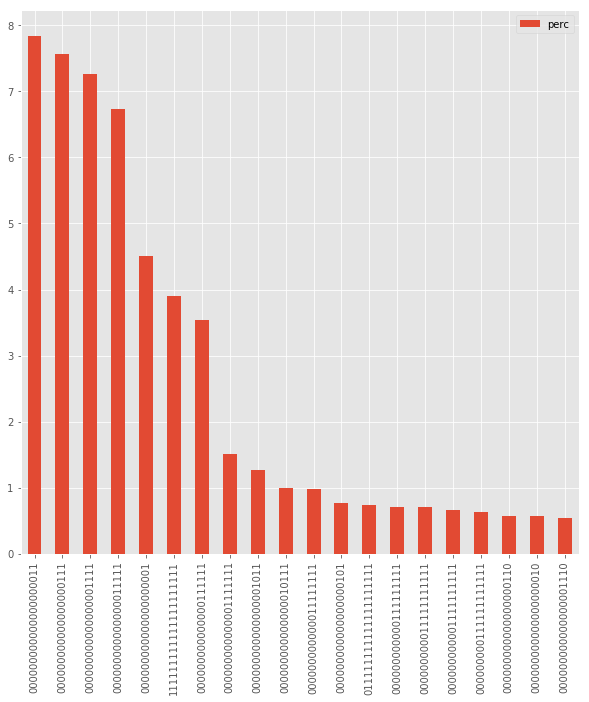

In [26]:
pattern_counts.sort_values('pattern', ascending=False).head(20).drop('pattern',axis=1).plot.bar(figsize=(10,10))

In [20]:
#fig, ax = plt.subplots()
#pattern_counts.pattern.plot(ax=ax,figsize=(15,15),rot=45)
#tick_idx = plt.xticks()[0]
#year_labels = df.years[tick_idx].values
#ax.xaxis.set_ticklabels(xlabels)

#pattern_counts.pattern.plot(figsize=(15,15),xticks=xlabels)

In [27]:
pattern_counts.perc[pattern_counts.pattern>1000].sum()

59.955

From the table above we see that that log normalization has helped in reducing the variation of the terms across the decades.

There are still 357971 possible unigrams in the dataset, and that would mean we would theoritically 357971*357971 rows in the bigram dataset.

It then makes sence to figure out ways of eliminating uni-grams that are less "informative".

A unigram could be considered to be "informative" if it -

1. Occurs consistently across the decades. (Given by the presence column)
2. Has a good frequency accoess the decades. (Given by the cf column)


Given below are graphs and more statistics that hopefully could help you in deciding the correct amount of unigrams that should be selected. 

In [28]:
decade_presence=unigram.presence.value_counts().to_frame()
decade_presence['perc']=round((decade_presence.presence/decade_presence.presence.sum())*100,3)
decade_presence.sort_index(inplace=True)
decade_presence

,presence,perc
1,25218,7.996
2,43581,13.818
3,45320,14.369
4,40869,12.958
5,34507,10.941
6,23507,7.453
7,16038,5.085
8,12027,3.813
9,9469,3.002
10,7940,2.517


The table above and the plot below show how the proportion of words changes w.r.t the Presence column.

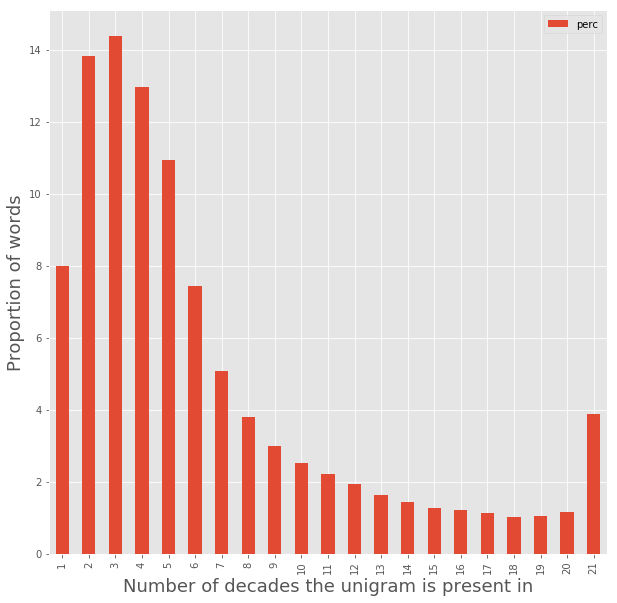

In [29]:
fig, ax = plt.subplots()
decade_presence.drop('presence',axis=1).plot.bar(ax=ax,figsize=(10,10))
plt.xlabel('Number of decades the unigram is present in', fontsize=18)
plt.ylabel('Proportion of words', fontsize=18)
plt.show()

What we could decipher from above is that several words only belong in 4 of fewer decades. Such words could be removed as they might be helpful in discovering future compounds.

You could make a call on how important this statistic is.

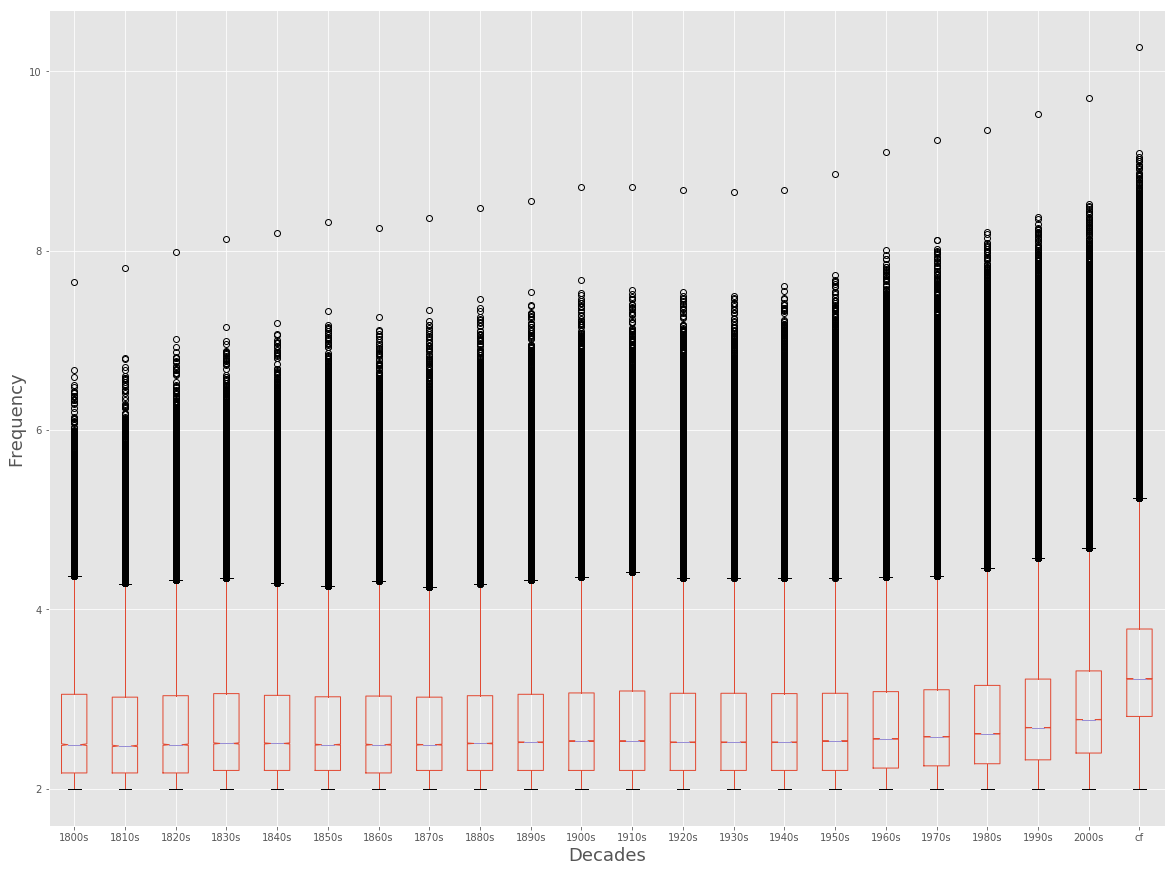

In [24]:

fig, ax = plt.subplots()
unigram.drop('presence',axis=1).plot.box(ax=ax,showfliers=True,figsize=(20,15),legend =True,notch=True)

plt.xlabel('Decades', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()


From the boxplot of Decades vs. the Frequency of a unigram we can see the visual represention of the description of the unigram dataset.

The cf (Collection Frequency) column encompasses the information of a unigram for all the decades, and hence should be useful in selecting the possible unigrams.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb697d366d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb43f21bb70>]], dtype=object)

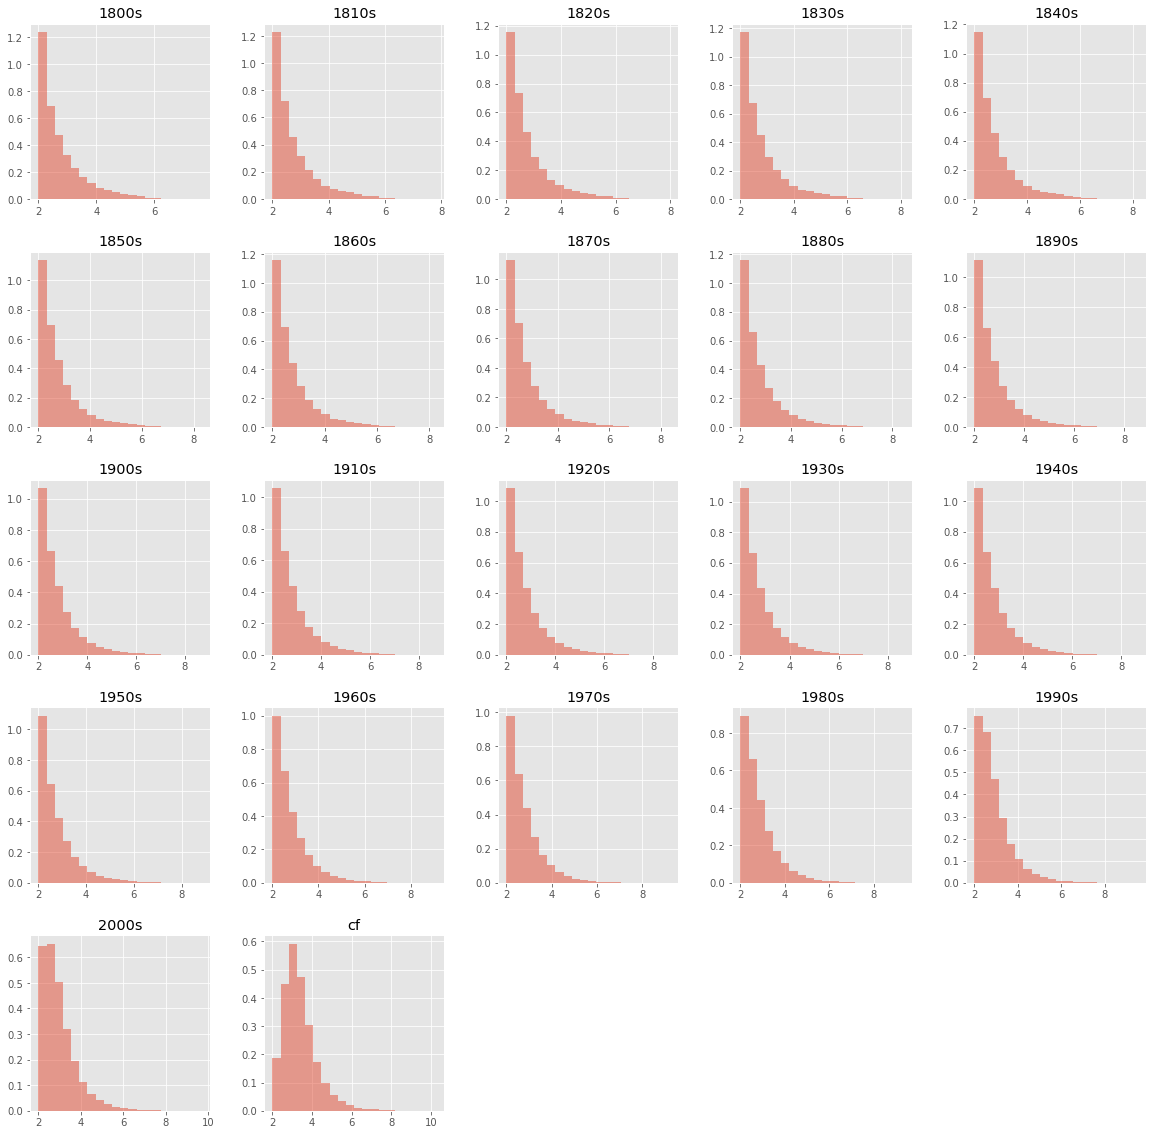

In [25]:
unigram.hist(figsize=(20,20),alpha=0.5,bins=20,normed=1)

The histograms do not seem to highlight anything out of the blue.

The graphs below are maybe where Lonneke could give her perpective.

Each individual graph shows how the Collection Frequency varies w.r.t the Presence column.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4a7254588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb4db73a518>]], dtype=object)

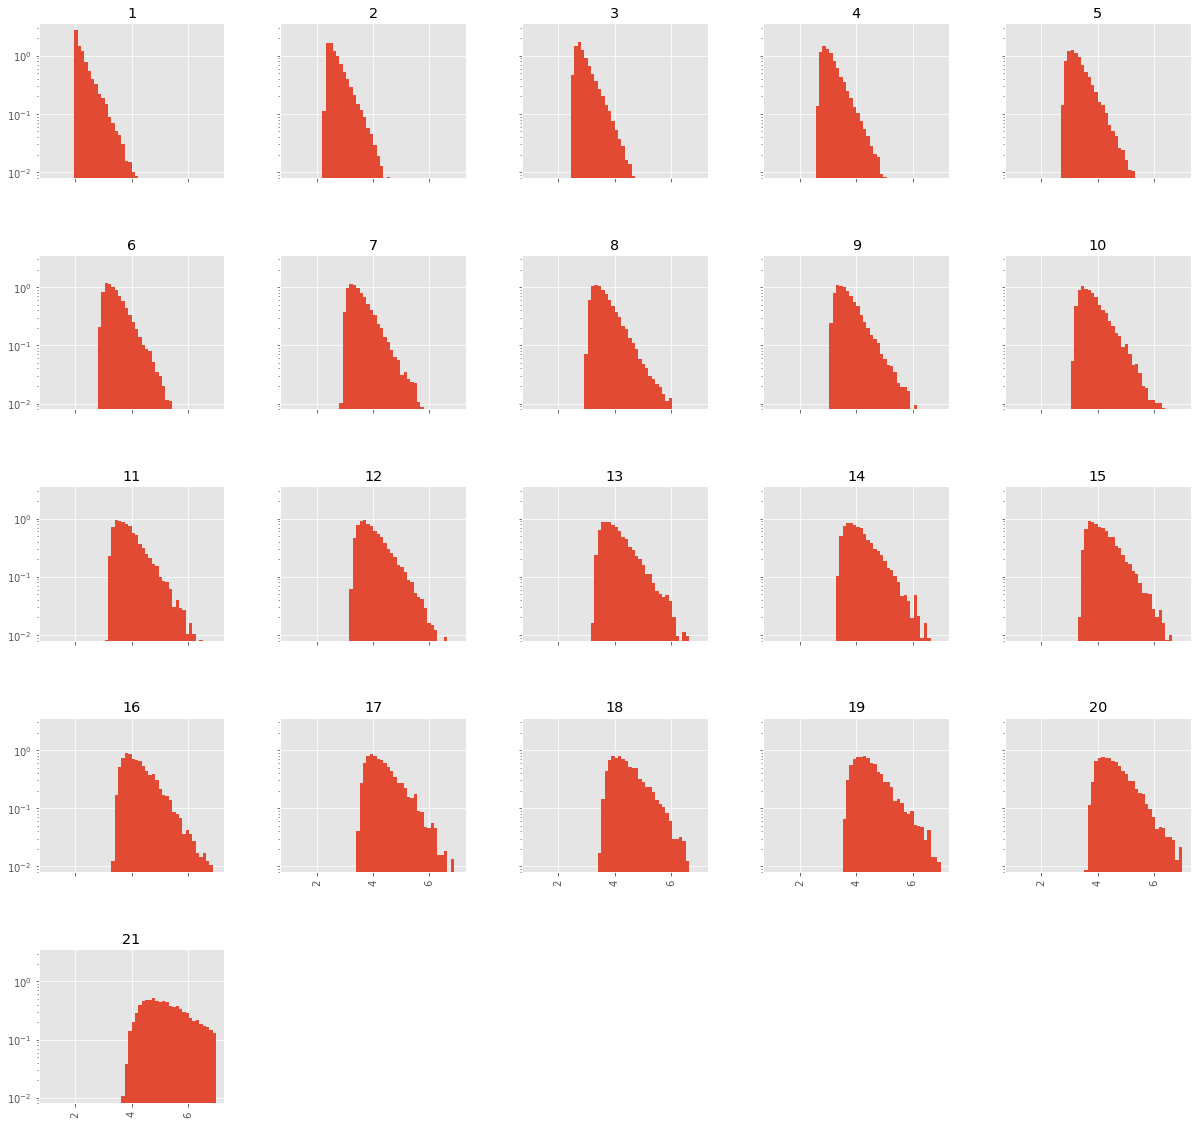

In [26]:
unigram.hist(by= 'presence',column ='cf', figsize=(20, 20),bins=50,sharex=True,log=True,sharey=True,normed=True,range=(1,7))

In both the Histograms and the Boxplots, following are observed -

1. The distribution of the cf spreads out (becomes more normal as well) as the presence of a unigram increases.
2. The median and the IQR (the region represented by the box in the bloxplot) keep shifting higher.



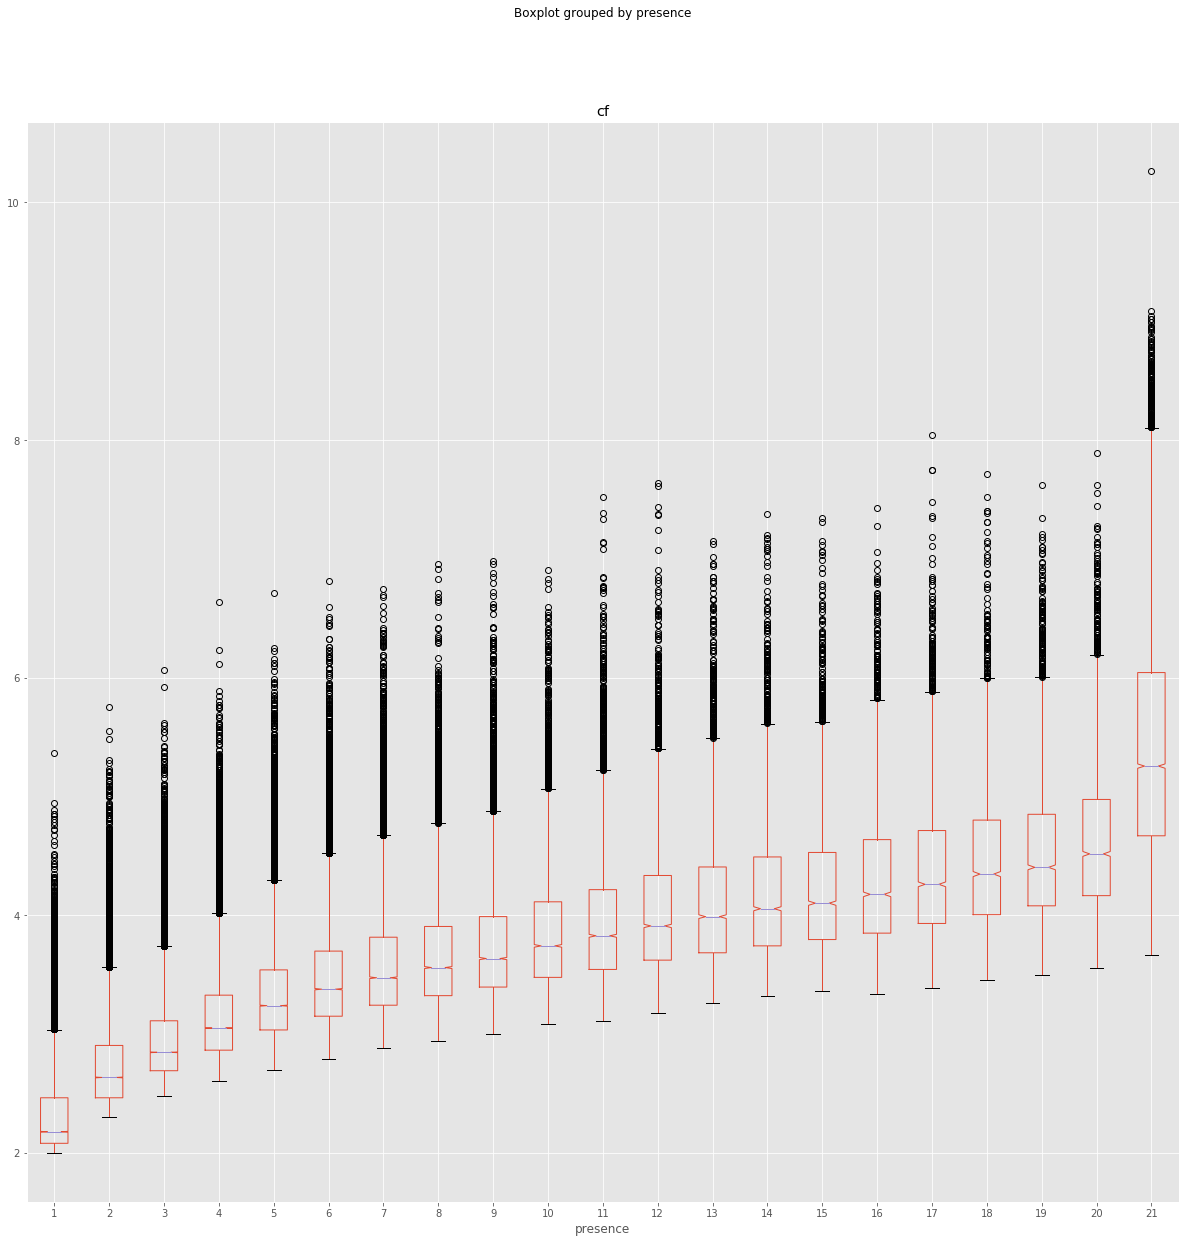

In [27]:
#fig, ax = plt.subplots()
unigram.boxplot(by= 'presence',column ='cf',figsize=(20, 20),notch=True)
#plt.figure(figsize=(20, 20))
#plt.axhline(y=2, color='r', linestyle='-')
#plt.xlabel('Presence', fontsize=18)
#plt.ylabel('Collection Frequency', fontsize=18)

#plt.show()

The boxplots could help you in deciding on the cutoff value for the collection frequency. 

For example, if you wish to select unigrams that have a collection frequency > 2 and have been seen in 4 or more decades, then you would the graph below.


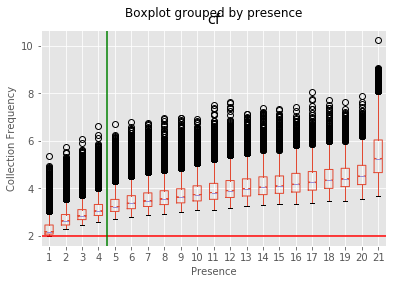

In [28]:
fig, ax = plt.subplots()
unigram[['presence','cf']].boxplot(ax=ax,by= 'presence',figsize=(20,20),notch=True)
#plt.figure(figsize=(20, 20))
plt.axhline(y=2, color='r', linestyle='-')
plt.axvline(x=4.5,color='g',linestyle='-')
plt.xlabel('Presence', fontsize=10)
plt.ylabel('Collection Frequency', fontsize=10)

plt.show()

The fact that the distributions are changing should not too suprising, as it makes sence that the cf inscreases as the decades go by.

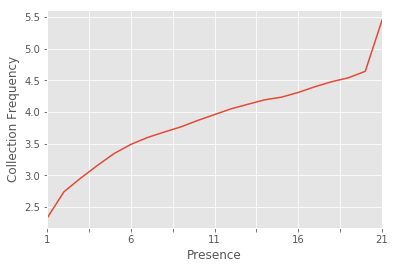

In [29]:
ax=unigram.groupby('presence')['cf'].mean().plot()
ax.set(xlabel="Presence", ylabel="Collection Frequency")

In [30]:
with open('/fs/scratch/users/dharpt/unigrams/unigrams.csv', 'a') as f:
    unigram.to_csv(f, header=False)

In [31]:
unigram.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319916 entries, a_ADJ to azzuz_NOUN
Data columns (total 24 columns):
1800s       21878 non-null float64
1810s       27759 non-null float64
1820s       33452 non-null float64
1830s       35520 non-null float64
1840s       41725 non-null float64
1850s       50852 non-null float64
1860s       46908 non-null float64
1870s       54124 non-null float64
1880s       63176 non-null float64
1890s       70560 non-null float64
1900s       83046 non-null float64
1910s       76539 non-null float64
1920s       79890 non-null float64
1930s       81730 non-null float64
1940s       82839 non-null float64
1950s       114248 non-null float64
1960s       166426 non-null float64
1970s       197311 non-null float64
1980s       219420 non-null float64
1990s       252357 non-null float64
2000s       281809 non-null float64
cf          319916 non-null float64
presence    319916 non-null category
pattern     319916 non-null object
dtypes: category(1), float64(22), obj